<a href="https://colab.research.google.com/github/SajalSinha/CardioVascular-Risk-Prediction/blob/main/CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import cross_val_score

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/SajalSinha/CardioVascular-Risk-Prediction/main/data_cardiovascular_risk.csv")

In [152]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [154]:
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


# To check Null values

In [155]:
# to form dataframe of null values and represent them in %age form which will be helpfull in knowing if we had 
# to drop any column right away

missing_values = pd.DataFrame(df.isnull().mean()*100) 
missing_values

,0
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [156]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [157]:
list(df['BPMeds'].unique())

[0.0, nan, 1.0]

In [158]:
list(df['education'].unique())

[2.0, 4.0, 1.0, 3.0, nan]

In [159]:
# BMI, totCHol, cigsperDay, glucose are some parameters whose missing values can be easily filled with mean values of that resp. column.
# BPMeds, Education are some parameters whose missing values can be easily filled with mode values of that resp. column

In [160]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [161]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [162]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Dummies Input

In [163]:
sex = pd.get_dummies(df['sex'],prefix='sex')
# sex = sex.drop(['sex_0'],axis=1)

is_smoking = pd.get_dummies(df['is_smoking'],prefix='is_smoking')
# is_smoking = is_smoking.drop(['is_smoking_0'],axis=1)

In [164]:
df = pd.concat([df,sex,is_smoking],axis=1)
# df = df.drop(['sex','is_smoking'],axis=1)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,1,0,0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,1,1,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0,0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,0,1,0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,1,0,0,1


#Outlier Detection

In [165]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                 1694.5000
age                  14.0000
education             2.0000
cigsPerDay           20.0000
BPMeds                0.0000
prevalentStroke       0.0000
prevalentHyp          1.0000
diabetes              0.0000
totChol              58.0000
sysBP                27.0000
diaBP                15.5000
BMI                   4.9675
heartRate            15.0000
glucose              13.0000
TenYearCHD            0.0000
sex_F                 1.0000
sex_M                 1.0000
is_smoking_NO         1.0000
is_smoking_YES        1.0000
dtype: float64


In [ ]:
df['id'] = df.id.astype(int)
# df2['id'] = df2.id.astype(int)
print((df['age'] < (Q1 - 1.5 * IQR)) or (df['age'] > (Q3 + 1.5 * IQR)))

In [ ]:
sns.scatterplot(df)

#EDA

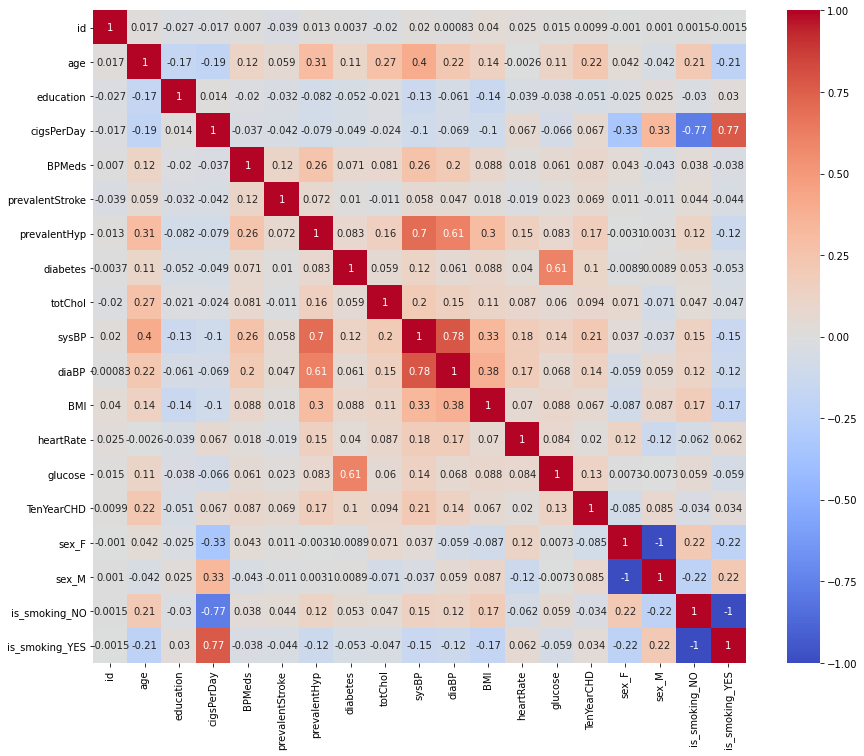

In [169]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

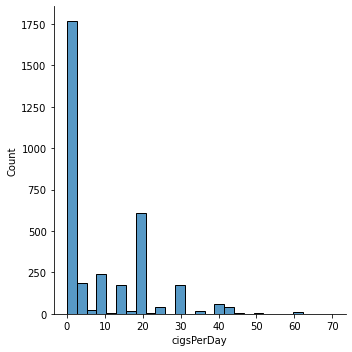

In [170]:
sns.displot(df['cigsPerDay'])

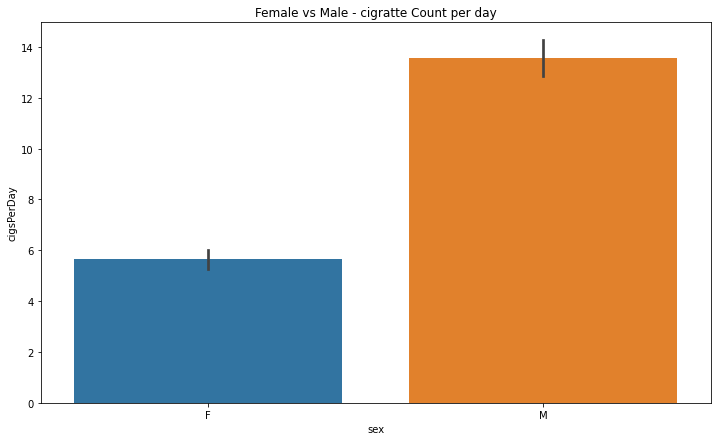

In [171]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'cigsPerDay', data= df)
plt.title('Female vs Male - cigratte Count per day')
plt.show()

# Males consume more cigrattes than females per day.

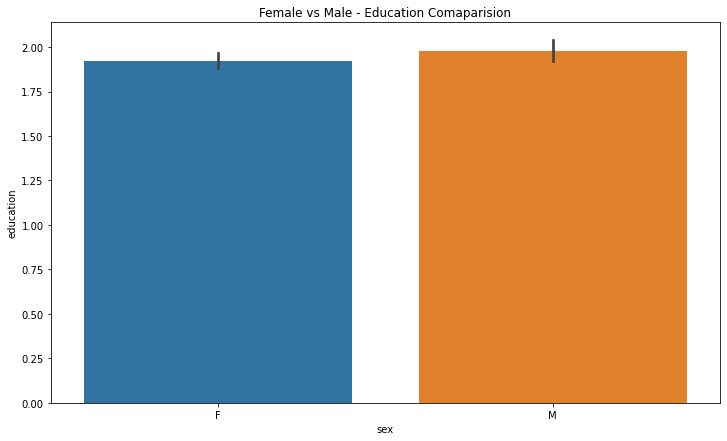

In [172]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'education', data= df)
plt.title('Female vs Male - Education Comaparision')
plt.show()

#Both males and females those who smoke are well educated.

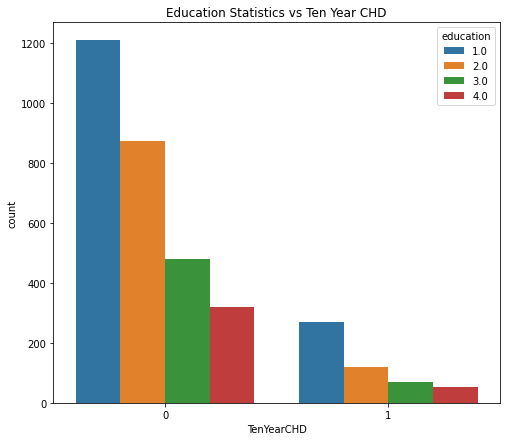

In [173]:
plt.figure(figsize=(8,7))
sns.countplot(x='TenYearCHD', hue = 'education', data= df)
plt.title('Education Statistics vs Ten Year CHD')
plt.show()

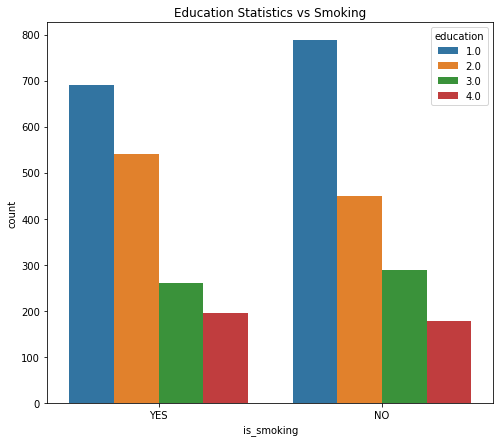

In [174]:
plt.figure(figsize=(8,7))
sns.countplot(x='is_smoking', hue = 'education', data= df)
plt.title('Education Statistics vs Smoking')
plt.show()

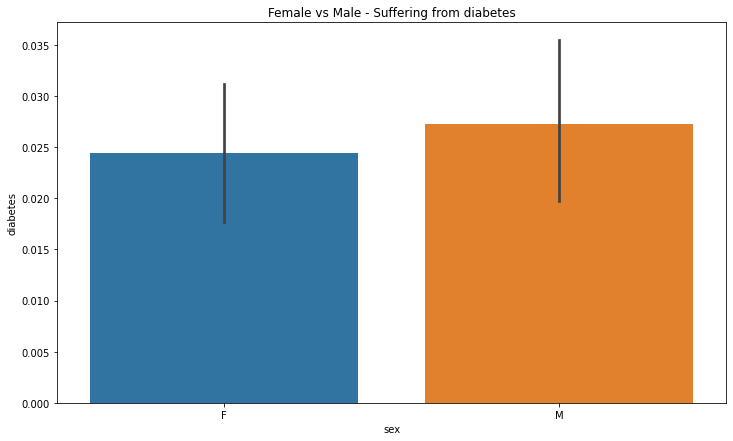

In [175]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'diabetes', data= df)
plt.title('Female vs Male - Suffering from diabetes')
plt.show()

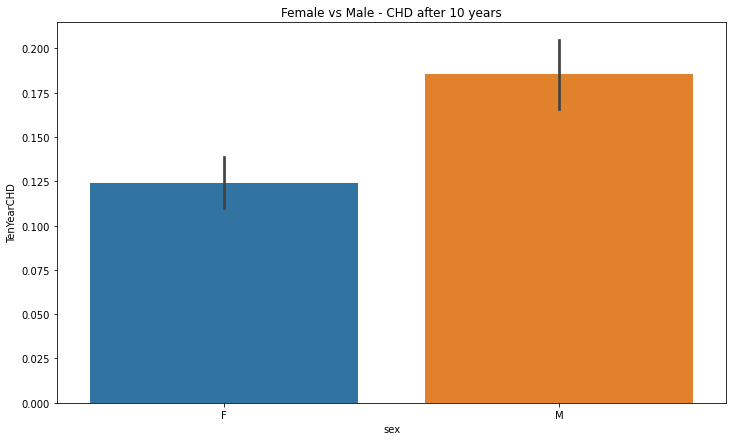

In [176]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'TenYearCHD', data= df)
plt.title('Female vs Male - CHD after 10 years')
plt.show()

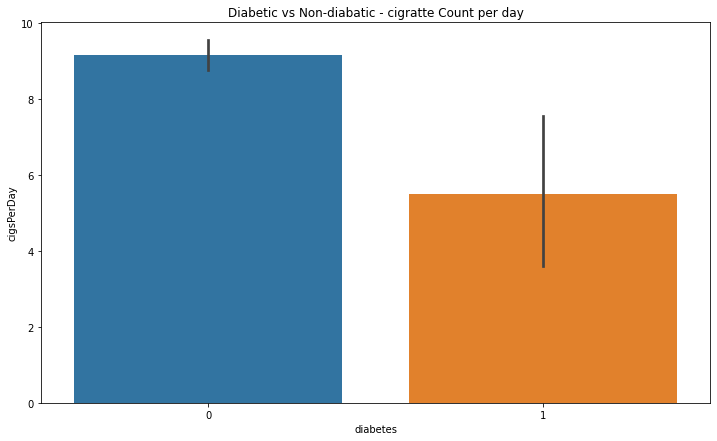

In [177]:
plt.figure(figsize=(12,7))
sns.barplot(x='diabetes', y = 'cigsPerDay', data= df)
plt.title('Diabetic vs Non-diabatic - cigratte Count per day')
plt.show()

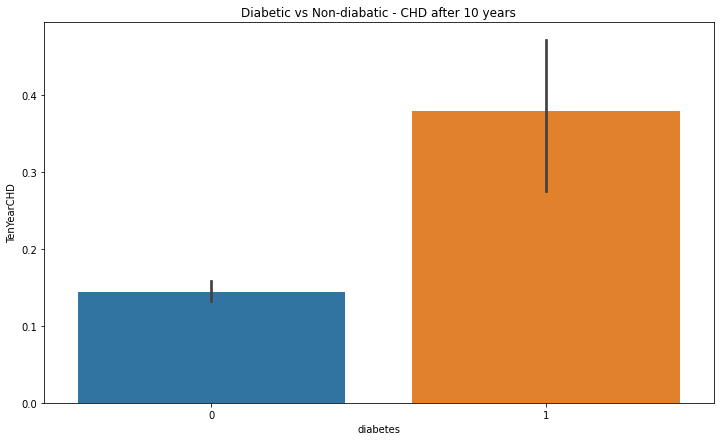

In [178]:
plt.figure(figsize=(12,7))
sns.barplot(x='diabetes', y = 'TenYearCHD', data= df)
plt.title('Diabetic vs Non-diabatic - CHD after 10 years')
plt.show()

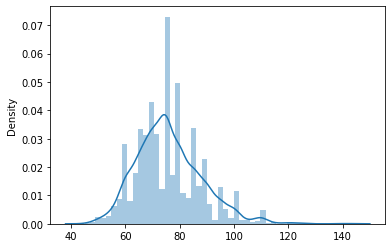

In [179]:
sns.distplot(x = df['heartRate'])

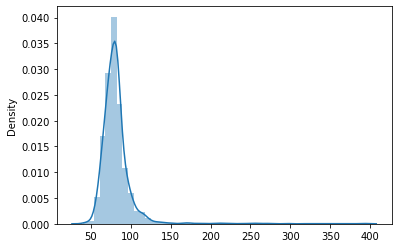

In [180]:
sns.distplot(x = df['glucose'])

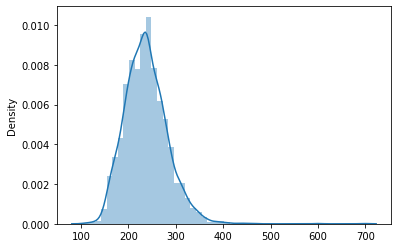

In [181]:
sns.distplot(x = df['totChol'])

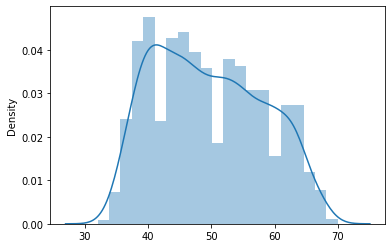

In [182]:
sns.distplot(x = df['age'])

# Data Processing

## Standard Scalling

In [183]:
df = df.drop(['sex','is_smoking'],axis=1)
y=df['TenYearCHD']
X=df.drop('TenYearCHD',axis=1)

In [184]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Data Spliting

In [185]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [186]:
# Stores the accuracies obtained by employing various ML models
accuracies = {}

# Model Training

## Define Confusion Matrix Function
It will help in smooth going

In [188]:
# Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report 
def confusion_matrix_compute(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred) 
    conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
    plt.figure(figsize = (8, 5)) 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
    plt.show() 
  
    print('The details for confusion matrix is =') 
    print (classification_report(y_test, y_pred))

## Logistic Regression

In [189]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
chances=(sum(y_pred)/y_pred.size)*100
acc = logreg.score(X_test,y_test)*100 
accuracies['Logistic Regression'] = acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Logistic Regression Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 2.51%
Logistic Regression Model Accuracy is 84.51%


CONFUSION MATRIX


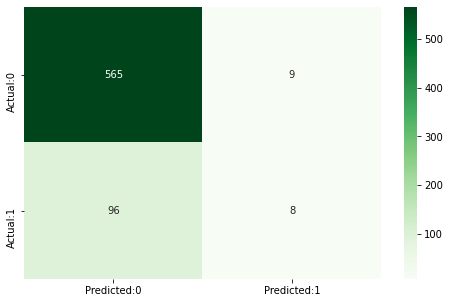

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       574
           1       0.47      0.08      0.13       104

    accuracy                           0.85       678
   macro avg       0.66      0.53      0.52       678
weighted avg       0.80      0.85      0.79       678



In [190]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

##KNN Classifier

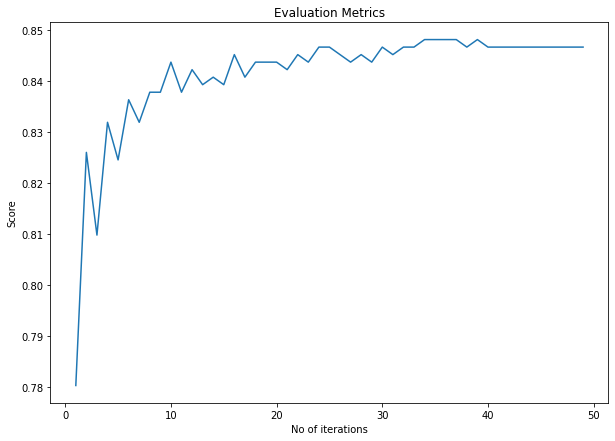

In [196]:
# KNN Classsifier
from sklearn.neighbors import KNeighborsClassifier
score_metrics=[]
chances=[]
iterations=50
for i in range(1,iterations):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    score_metrics.append(knn.score(X_test,y_test))

plt.figure(figsize=(10,7))
plt.plot(range(1,iterations),score_metrics)
plt.title("Evaluation Metrics")
plt.xlabel("No of iterations")
plt.ylabel("Score")
plt.show()

CONFUSION MATRIX


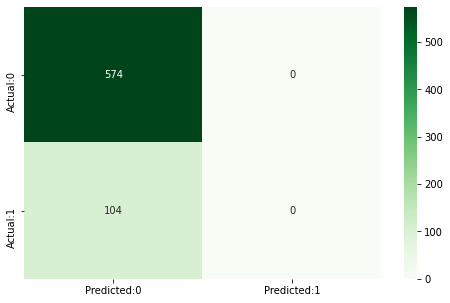

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       574
           1       0.00      0.00      0.00       104

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



In [197]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [198]:
acc=max(score_metrics)*100
max_index = np.argmax(score_metrics)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
accuracies['KNN']=acc
print("Max Model Accuracy is {:.2f}%".format(acc),"at iteration no. {:.2f}".format(max_index))
print("KNN Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 0.15%
Max Model Accuracy is 84.81% at iteration no. 33.00
KNN Model Accuracy is 84.81%
